---
<a name='title'></a>
# **<font color="Navy"> Temas Selectos </font>**
## **<font color="RoyalBlue"> Tema 2 Análisis de datos </font>**
### **<font color="DodgerBlue"> Notebook 4: NetCDF </font>**
#### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

## **<font color="ForestGreen">  ¿Por qué NetCDF? </font>**


El formato de archivo NetCDF (Network Common Data Form) es ampliamente utilizado en las ciencias del clima y en muchos otros campos científicos y de ingeniería. NetCDF es un formato de archivo diseñado para almacenar datos científicos multidimensionales, como datos climáticos, oceanográficos, atmosféricos, geoespaciales y otros tipos de datos gridded (en forma de cuadrícula). Fue desarrollado originalmente por Unidata en la década de 1980 y se ha convertido en un estándar de facto en muchas disciplinas científicas.

Los archivos NetCDF pueden contener datos multidimensionales, metadatos descriptivos y atributos adicionales que proporcionan información sobre los datos almacenados. Estos archivos son eficientes para el almacenamiento y la manipulación de grandes conjuntos de datos, ya que permiten acceder a subconjuntos de datos y realizar operaciones en ellos de manera eficiente. Por esto se dice que los datos en formato netcdf son "auto-descriptivos".

Un link muy importante de documentación de NetCDF https://www.unidata.ucar.edu/software/netcdf/

Algunas de las características clave de xarray que lo hacen especialmente útil en las ciencias de la Tierra son:

-  Portabilidad: Los archivos NetCDF son portables entre diferentes plataformas y sistemas operativos, lo que facilita el intercambio de datos entre investigadores y la colaboración en proyectos científicos.

- Eficiencia de Almacenamiento: NetCDF utiliza una compresión eficiente y una estructura de datos optimizada para minimizar el tamaño del archivo y reducir los requisitos de almacenamiento.

- Acceso Eficiente a los Datos: el formato NetCDF permite acceder rápida y eficientemente a subconjuntos de datos y realizar operaciones en ellos, lo que facilita el análisis de grandes volúmenes de datos climáticos.Etiquetado de dimensiones y coordenadas: Xarray permite etiquetar dimensiones y coordenadas, lo que facilita la manipulación y el análisis de datos multidimensionales.

Paqueterías existentes en Python para analizar datos en formato nectdf:

- Iris: https://scitools-iris.readthedocs.io/en/stable/
- NetCDF4: https://unidata.github.io/netcdf4-python/
- pyproj: https://pyproj4.github.io/pyproj/stable/
- xarray: el de esta clase

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=12.5,fancybox=True,shadow=True)

### **<font color="ForestGreen">  Datos de HadSST </font>**

Los datos de HadSST (Hadley Centre Sea Ice and Sea Surface Temperature) son un conjunto de datos que contienen observaciones de temperatura de la superficie del mar (SST) recopiladas por el Met Office Hadley Centre. Estos datos se utilizan ampliamente en la investigación climática para estudiar las variaciones de temperatura en los océanos a lo largo del tiempo.

Aquí hay una descripción de los principales aspectos de los datos de HadSST:

- Fuente de Datos: Los datos de HadSST son recopilados y mantenidos por el Met Office Hadley Centre, que es parte del Servicio Meteorológico del Reino Unido. Se basan en observaciones de temperatura de la superficie del mar obtenidas de una variedad de fuentes, incluidas boyas oceánicas, buques y satélites.

- Resolución Espacial y Temporal: Los datos de HadSST están disponibles con diferentes resoluciones espaciales y temporales. Las versiones más recientes suelen tener una resolución temporal mensual y una resolución espacial de alrededor de 1° de latitud y longitud.

- Cobertura Temporal: Los datos de HadSST cubren un período de tiempo prolongado, que se remonta a finales del siglo XIX o principios del siglo XX, dependiendo de la versión específica del conjunto de datos. Esto permite estudiar las variaciones de temperatura del mar a lo largo de varias décadas o incluso siglos.

- Calidad y Homogeneidad: El Met Office Hadley Centre se esfuerza por mantener la calidad y la homogeneidad de los datos de HadSST. Se aplican correcciones y ajustes a los datos para corregir errores instrumentales, cambios en los métodos de medición y otros sesgos potenciales, con el objetivo de producir un conjunto de datos coherente y de alta calidad.

- Aplicaciones: Los datos de HadSST se utilizan en una amplia gama de aplicaciones en la investigación climática, incluida la monitorización de la variabilidad del clima oceánico, el estudio de los efectos del cambio climático en los océanos, la calibración y validación de modelos climáticos, y la evaluación de los impactos ambientales y socioeconómicos relacionados con los océanos y el clima.
    
    
Descarga: https://www.metoffice.gov.uk/hadobs/hadsst4/data/download.html

### **<font color="ForestGreen">  Abriendo datos en formato netcdf </font>**

La función de xarray, `xr.open_dataset()` , sirve para abrir datos en formato de netcdf https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html. 

El primer y único parámetro obligatorio de esta función es la ruta al archivo como un `str`

In [4]:
ds=xr.open_dataset('HadSST.4.0.1.0_median.nc')
ds

<xarray.Dataset>
Dimensions:         (time: 2090, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T...
  * latitude        (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 ...
    time_bnds       (time, bnds) datetime64[ns] ...
    latitude_bnds   (latitude, bnds) float64 ...
    longitude_bnds  (longitude, bnds) float64 ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

Ahora bien, este objeto tipo `xarray.Dataset` tiene dimensiones, coordenadas, indices, atributos y variables. 

Podemos imprimir la lista de variables con el atributo de "variables".

In [5]:
ds.variables

Frozen({'tos': <xarray.Variable (time: 2090, latitude: 36, longitude: 72)>
[5417280 values with dtype=float32]
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)..., 'time': <xarray.IndexVariable 'time' (time: 2090)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2023-12-16T12:00:00.000000000',
       '2024-01-16T12:00:00.000000000', '2024-02-15T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    long_name:      time, 'time_bnds': <xarray.Variable (time: 2090, bnds: 2)>
[4180 values with dtype=datetime64[ns]], 'latitude': <xarray.IndexVariable 'latitude' (latitude: 36)>
array([-87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5, -42.5,
 

En Xarray, un dataset nos permite guardar datos de diferentes variables en un mismo dataset. Por ejemplo, dos variables con las mismas dimensiones y coordenadas, pueden ser almacenadas de manera compacta en un mismo dataset, como lo muestra la propia imagen de ilustración de Xarray: 

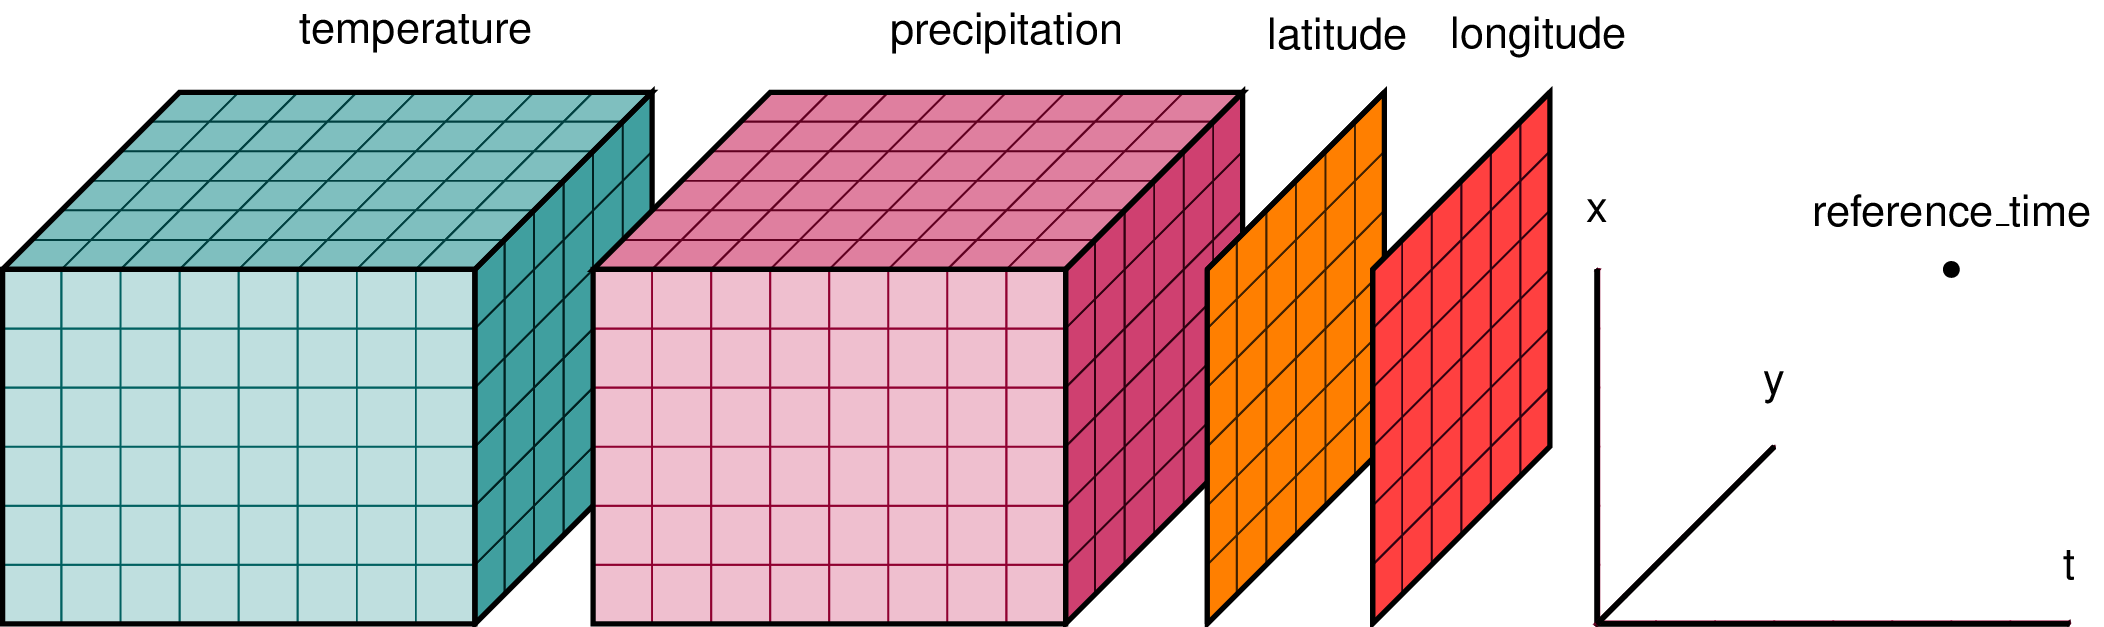

Podemos seleccionar una de las variables en un dataset, por ejemplo la temperatura superficial del mar, _temperature ocean surface (tos)_, con la siguiente instrucción:

In [6]:
sst=ds['tos']
sst

<xarray.DataArray 'tos' (time: 2090, latitude: 36, longitude: 72)>
[5417280 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T12:00:00
  * latitude   (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)...

Inspeccionar un objeto producto de un archivo NetCDF se puede hacer a través de los atributos de un xarray DataArray o Dataset. Por ejemplo, la coordenada del tiempo.

In [7]:
sst.time

<xarray.DataArray 'time' (time: 2090)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2023-12-16T12:00:00.000000000',
       '2024-01-16T12:00:00.000000000', '2024-02-15T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    long_name:      time

O para la latitud:

In [8]:
lats=sst.latitude
lats

<xarray.DataArray 'latitude' (latitude: 36)>
array([-87.5, -82.5, -77.5, -72.5, -67.5, -62.5, -57.5, -52.5, -47.5, -42.5,
       -37.5, -32.5, -27.5, -22.5, -17.5, -12.5,  -7.5,  -2.5,   2.5,   7.5,
        12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,  47.5,  52.5,  57.5,
        62.5,  67.5,  72.5,  77.5,  82.5,  87.5])
Coordinates:
  * latitude  (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
Attributes:
    axis:           Y
    bounds:         latitude_bnds
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

Las dimensiones del arreglo se pueden acceder con el uso del punto, o a través de la siguiente sintaxis:

In [9]:
lons=sst['longitude']
lons

<xarray.DataArray 'longitude' (longitude: 72)>
array([-177.5, -172.5, -167.5, -162.5, -157.5, -152.5, -147.5, -142.5, -137.5,
       -132.5, -127.5, -122.5, -117.5, -112.5, -107.5, -102.5,  -97.5,  -92.5,
        -87.5,  -82.5,  -77.5,  -72.5,  -67.5,  -62.5,  -57.5,  -52.5,  -47.5,
        -42.5,  -37.5,  -32.5,  -27.5,  -22.5,  -17.5,  -12.5,   -7.5,   -2.5,
          2.5,    7.5,   12.5,   17.5,   22.5,   27.5,   32.5,   37.5,   42.5,
         47.5,   52.5,   57.5,   62.5,   67.5,   72.5,   77.5,   82.5,   87.5,
         92.5,   97.5,  102.5,  107.5,  112.5,  117.5,  122.5,  127.5,  132.5,
        137.5,  142.5,  147.5,  152.5,  157.5,  162.5,  167.5,  172.5,  177.5])
Coordinates:
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Attributes:
    axis:           X
    bounds:         longitude_bnds
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

### **<font color="ForestGreen">  Slicing con condición </font>**

En Xarray puedes realizar slicing a partir de condiciones. Para esto, es importante mencionar que esta sintaxis de slicing es ligeramente a la de la clase pasada. 

Una manera de hacer slicing es con el método  `xarray.DataArray.loc[condition]` o bien  `xarray.DataArray.loc[dict]`. 

In [10]:
# seleccionando solo latitudes ecuatoriales
eq_sst=sst.loc[dict(latitude=lats[np.abs(lats)<10])]
eq_sst.latitude

<xarray.DataArray 'latitude' (latitude: 4)>
array([-7.5, -2.5,  2.5,  7.5])
Coordinates:
  * latitude  (latitude) float64 -7.5 -2.5 2.5 7.5
Attributes:
    axis:           Y
    bounds:         latitude_bnds
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

Otra manera es utilizando la función `where()` que busca dónde en un arreglo se cumple una condición. Si, además agregamos drop=True, quiere decir que nos deshacemos de todos los datos que no cumplan esta condición. 

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> Seleccionar los datos de temperatura superficial del mar de HadSST solamente para datos que sean correspondientes a años de 1991 en adelante.

<font color="LightRed"> Para esto, podemos utilizar la función `where()` y la coordenada del tiempo. 
    
    
---


In [11]:
banda=sst.where(sst.time.dt.year>1990,drop=True)
banda

<xarray.DataArray 'tos' (time: 398, latitude: 36, longitude: 72)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  1.0651951 ,
          2.4556713 ,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.65820324,  0.6262471 ,         nan, ...,  0.8264117 ,
          0.47240654,  0.16853906],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.90401053,
         -0.69790274, -0.87430036],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 0.15055552,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-16T12:00:00 ... 2024-02-15T12:00:00
  * latitude   (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)...

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 5 - Recorte de SST </font>**

<font color="DarkBlue"> 1. Haga un slice del arreglo sst, donde recorte todas las longitudes al Este del meridiano de Greenwich y al oeste de la línea de fecha (0-180E) y para el hemisferio norte en los años de 1995-2000.  
        
---

### **<font color="ForestGreen">  Guardando datos en netcdf </font>**

Una vez que hemos procesado nuestros datos. Tal vez queramos guardarlos en algún lugar para poder retomar desde este nuevo punto, o checkpoint, y no desde el principio. Para esto es muy útil la función de xarray `.to_netcdf(ruta)` que nos permite guardar datos en cualquier ruta que queramos.

En este ejemplo vamos a guardar los datos guardados en la variable banda

In [12]:
# definimos la ruta 
ruta='datos_salida.nc'
# guardamos los resultados en un netcdf
banda.to_netcdf(ruta)

### **<font color="ForestGreen">  Más análisis de NetCDF con Xarray </font>**

Hay una amplia gama de análisis que se pueden realizar en datos NetCDF utilizando Xarray. Algunos de los análisis comunes incluyen:

1. Promedios Temporales o Espaciales: Calcular promedios temporales o espaciales es una tarea común en el análisis de datos climáticos. Por ejemplo, podrías calcular el promedio mensual de la temperatura del aire o el promedio espacial de la concentración de un contaminante en una región específica.

2. Anomalías Climáticas: Calcular anomalías climáticas implica restar un promedio climatológico (por ejemplo, el promedio de un período de referencia) de los datos observados para revelar patrones y tendencias a lo largo del tiempo. Esto puede ayudar a identificar eventos extremos o cambios a largo plazo en el clima.

3. Tendencias Temporales: Identificar tendencias temporales en los datos climáticos es importante para comprender el cambio climático. Puedes realizar análisis de regresión lineal u otras técnicas estadísticas para evaluar las tendencias a lo largo del tiempo en variables como la temperatura, la precipitación, el nivel del mar, etc.

4. Correlación y Regresión: Analizar la correlación entre diferentes variables climáticas o entre variables climáticas y otros factores puede proporcionar información sobre las relaciones y posibles causas de los patrones observados en los datos.

### **<font color="ForestGreen"> Cálculos sencillos </font>**

Para todo el arreglo, subconjuntos del arreglo, podemos calcular estadísticos sencillos como lo son el promedio, máximo, mínimo y desviación estándar del datarray.

In [13]:
sst.mean()

<xarray.DataArray 'tos' ()>
array(0.02033158, dtype=float32)

In [14]:
print('mean',float(sst.mean()))
print('min',float(sst.min()))
print('max',float(sst.max()))
print('std',float(sst.std()))

mean 0.020331578329205513
min -8.244344711303711
max 8.93808364868164
std 0.9814325571060181


Los promedios se pueden hacer a lo largo de una o varias dimensiones, como el promedio zonal que significa promediar todas las longitudes para cada latitud. 

In [15]:
zonal=sst.mean('longitude')
zonal

<xarray.DataArray 'tos' (time: 2090, latitude: 36)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan, -1.4007574 , ...,  0.83094245,
         3.1347795 ,  0.24527982],
       [        nan,         nan, -0.37876004, ...,  0.45656645,
         2.0930347 ,         nan],
       [        nan,         nan, -0.72642887, ...,  0.94666165,
         0.1684616 ,  0.19050364]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T12:00:00
  * latitude  (latitude) float64 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5

### **<font color="ForestGreen"> Cálculos intermedios </font>**

#### **<font color="ForestGreen">  El promedio global </font>**

Teniendo datos globales y el conocimiento de cómo obtener promedios en Xarray seguramente pensará usted en obtener un promedio global. Esto, a la manera chacalona se puede hacer de la siguiente forma:

In [16]:
global1=sst.mean(['longitude','latitude'])
global1

<xarray.DataArray 'tos' (time: 2090)>
array([-0.3453247 , -0.33281362, -0.55432594, ...,  0.8886602 ,
        0.9174887 ,  0.87748396], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T12:00:00

 La Tierra es esférica, lo que significa que la temperatura no es uniforme en todas partes y varía según la latitud y la longitud. Por lo tanto, es necesario tener en cuenta la curvatura de la Tierra al calcular promedios globales de temperatura para evitar sesgos en los resultados.

Existen varios métodos para tener en cuenta la curvatura de la Tierra al calcular promedios globales de temperatura:

1. Pesos de Área: al calcular un promedio ponderado por área, se asignan pesos a cada punto de datos de temperatura basados en el área que representan en la superficie de la Tierra. Esto significa que los puntos de datos ubicados en áreas más grandes (cerca de los polos) tendrán un peso mayor que los puntos ubicados en áreas más pequeñas (cerca del ecuador). Esto compensa la distorsión causada por la curvatura de la Tierra y garantiza que cada área contribuya de manera equitativa al promedio global.

Una manera de asignar pesos a nuestro objeto sst es con la función coseno. El coseno de la latitud, por ejemplo, nos puede ayudar a medir los pesos. 

In [17]:
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

Esta función y variable de pesos busca calcular lo que se conoce como un promedio ponderado. Un promedio ponderado o con pesos es un tipo de promedio en el que se asignan pesos a cada valor antes de calcular la media. Estos pesos indican la importancia relativa de cada valor en el cálculo del promedio final. Es decir, los valores con pesos más altos contribuyen más al promedio que los valores con pesos más bajos.

En nuestro ejemplo, queremos darle más peso a las latitudes tropicales, ya que ocupan mayor área que las latitudes cercanas a los polos. Veamos, si, a través de la gráfica esto nos queda claro.

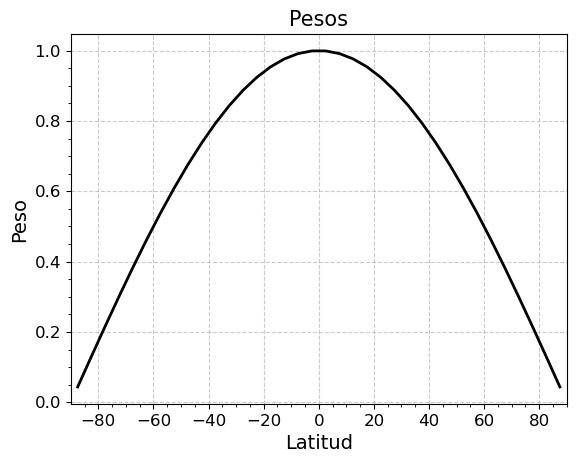

In [18]:
plt.plot(lats,weights,c='k',linewidth=2)
grafico_linea_ts(-90,90,'Latitud','Peso','Pesos',ymin=None,ymax=None,legend=False)

El cálculo del promedio ponderado implica multiplicar cada valor por su peso correspondiente, sumar los productos y luego dividir la suma total por la suma de los pesos. Matemáticamente, el promedio ponderado se calcula de la siguiente fórmula:

\begin{align}
\mu_p=\frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}
\end{align}

Donde:

- $x_i$ son los valores individuales que se están promediando.
- $w_i$ son los pesos correspondientes a cada valor xixi​.
- $n$ es el número total de valores.

Antes de calcular el promedio, xarray tiene una función llamada "weighted". 
La función `weighted()` en Xarray es una herramienta útil para calcular promedios ponderados o con pesos en conjuntos de datos multidimensionales. Esta función permite aplicar pesos a los datos a lo largo de una o varias dimensiones y luego calcular un promedio ponderado utilizando esos pesos.



In [19]:
# agregando los pesos a un nuevo objeto de xarray 
sst_weighted = sst.weighted(weights)

Con el nuevo objeto de xarray, sí podemos calcular los promedios.

In [20]:
global2=sst_weighted.mean(['longitude','latitude'])
global2

<xarray.DataArray 'tos' (time: 2090)>
array([-0.35175836, -0.34488831, -0.58171494, ...,  0.94424982,
        0.99693168,  0.95234287])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2024-02-15T12:00:00

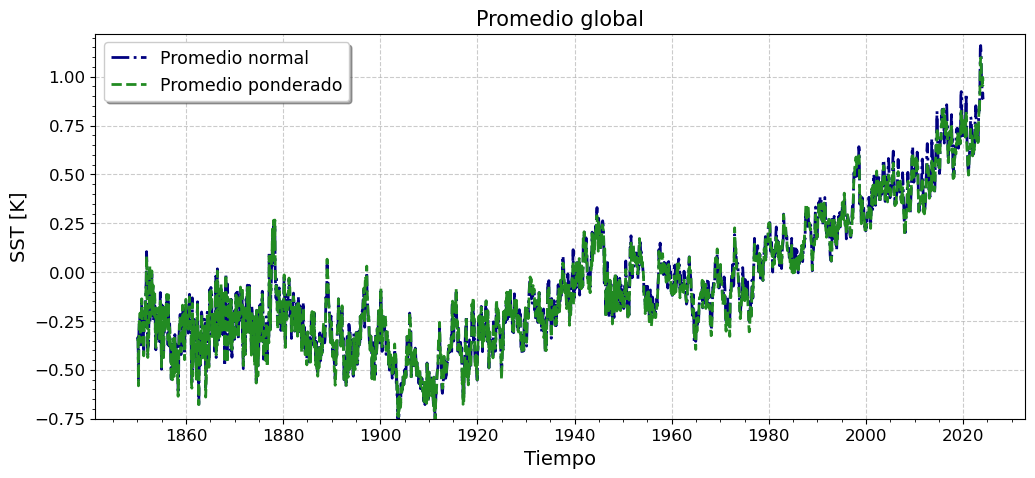

In [25]:
plt.figure(figsize=(12,5))
plt.plot(sst.time,global1,c='navy',label='Promedio normal',linewidth=2,linestyle='-.')
plt.plot(sst.time,global2,c='forestgreen',label='Promedio ponderado',linewidth=2,linestyle='--')
grafico_linea_ts(None,None,'Tiempo','SST [K]','Promedio global',ymin=-0.75,ymax=1.22,legend=True)

#### **<font color="ForestGreen"> Modificando la resolución de los datos </font>**

Xarray tiene además la capacidad de modificar la resolución espacial y temporal de los datos fácilmente. Veremos la segunda con el método de `resample()`. El método `resample()` en Xarray se utiliza para cambiar la frecuencia temporal de los datos mediante un proceso de re-muestreo. Esto es útil cuando tienes datos con una frecuencia temporal original y deseas cambiarla a una frecuencia diferente, ya sea para hacer análisis más fácilmente o para comparar los datos con otras series temporales que tienen una frecuencia diferente.

El método resample() opera de manera similar a cómo lo hace en Pandas. Toma como argumento un string que indica la nueva frecuencia deseada para los datos y luego aplica un proceso de agregación o interpolación para ajustar los datos a esa nueva frecuencia.

1. Agregación: Si la nueva frecuencia es una agregación (por ejemplo, de mensual a anual), el método resample() calculará el promedio, la suma u otra estadística sobre los datos en cada nuevo intervalo de tiempo.

2. Interpolación: Si la nueva frecuencia es una interpolación (por ejemplo, de mensual a diario), el método resample() calculará valores intermedios basados en una interpolación de los datos originales.

Recuerden revisar esta página para entender la simbología de los meses, años, días, etc. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [26]:
sst_anual=sst.resample(time='1Y').mean()

In [27]:
sst_global_anual=global1.resample(time='1Y').mean()
sst_global_anualp=global2.resample(time='1Y').mean()

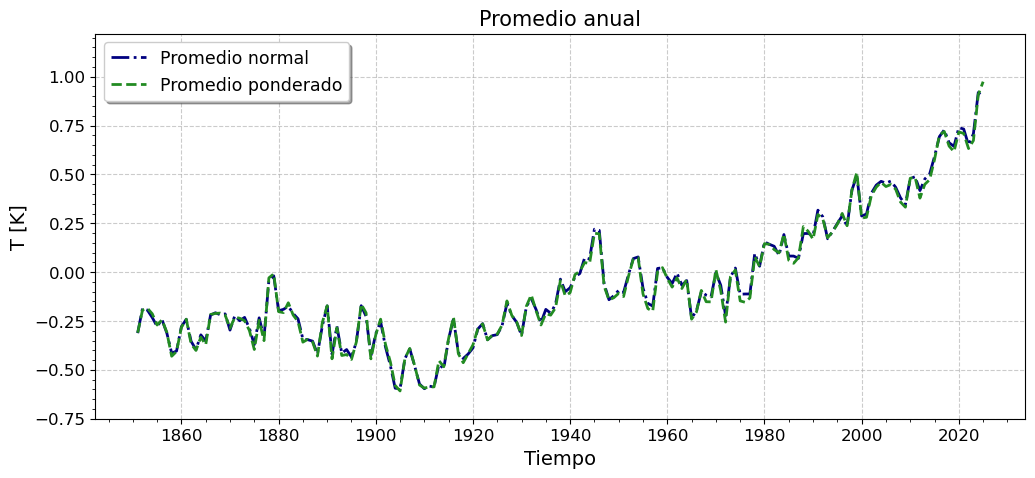

In [28]:
plt.figure(figsize=(12,5))
plt.plot(sst_anual.time,sst_global_anual,c='navy',label='Promedio normal',linewidth=2,linestyle='-.')
plt.plot(sst_anual.time,sst_global_anualp,c='forestgreen',label='Promedio ponderado',linewidth=2,linestyle='--')
grafico_linea_ts(None,None,'Tiempo','T [K]','Promedio anual',ymin=-0.75,ymax=1.22,legend=True)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 6 - Análisis de SST </font>**

<font color="DarkBlue"> 1. Obtenga la anomalía de la temperatura superficial del mar para la región del Golfo de México [22N-28N, 97W-87W] utilizando el método de promedio ponderado por el área.

<font color="DarkBlue"> 2. Grafique la serie de tiempo con frecuencia mensual y luego con frecuencia anual en el mismo gráfico indicando cada línea en la leyenda.
        
---